In [3]:
import numpy as np
import pandas as pd

# import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


# import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

import joblib


In [6]:
df = pd.read_csv('../dataset/ObesityDataSet.csv')

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,2.0,0.0,1.0,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,3.0,3.0,0.0,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,2.0,2.0,1.0,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II


In [110]:
print(df.shape)
print(df.columns)
df.describe()

(2111, 17)
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [111]:
df.describe(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [112]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [113]:
df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [114]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

24


In [115]:
df1 = df
df1.drop(['SCC','SMOKE','CAEC','CALC','MTRANS'], axis=1, inplace=True)

df1.to_csv('ObesityDataSet.csv', index=False)
ObeseDF = pd.read_csv('ObesityDataSet.csv')

ObeseDF.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,2.0,0.0,1.0,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,3.0,3.0,0.0,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,2.0,2.0,1.0,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II


In [70]:
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [71]:
for col in cat_cols:
    print(df[col].value_counts())
    print()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

FAVC
yes    1844
no      243
Name: count, dtype: int64

CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

SMOKE
no     2043
yes      44
Name: count, dtype: int64

SCC
no     1991
yes      96
Name: count, dtype: int64

CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64



### Feature Engineering

In [81]:
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'NObeyesdad']
le_mappings = {}


for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    le_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in le_mappings.items():
    print(f"Mapping for {col}: {mapping}")
    

Mapping for Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for FAVC: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for SCC: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for NObeyesdad: {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}


In [82]:
df["CAEC"] = df["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
df["CALC"] = df["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})

In [83]:
df.drop('MTRANS', axis=1, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,5
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,6


In [91]:
corr_matrix = df.corr()

nobeyesdad_corr = corr_matrix['NObeyesdad'].to_frame().reset_index().rename(columns={'index': 'features', 'NObeyesdad': 'corr'})\
                                .sort_values(by='corr', ascending=False)

nobeyesdad_corr

,features,corr
13,NObeyesdad,1.000000
3,Weight,0.388800
4,family_history_with_overweight,0.330391
1,Age,0.237792
12,CALC,0.132821
9,CH2O,0.092586
5,FAVC,0.041023
2,Height,0.039395
6,FCVC,0.025803
0,Gender,0.014699


In [89]:
X = df.drop("NObeyesdad",axis=1)
y = df["NObeyesdad"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1669, 13), (418, 13), (1669,), (418,))

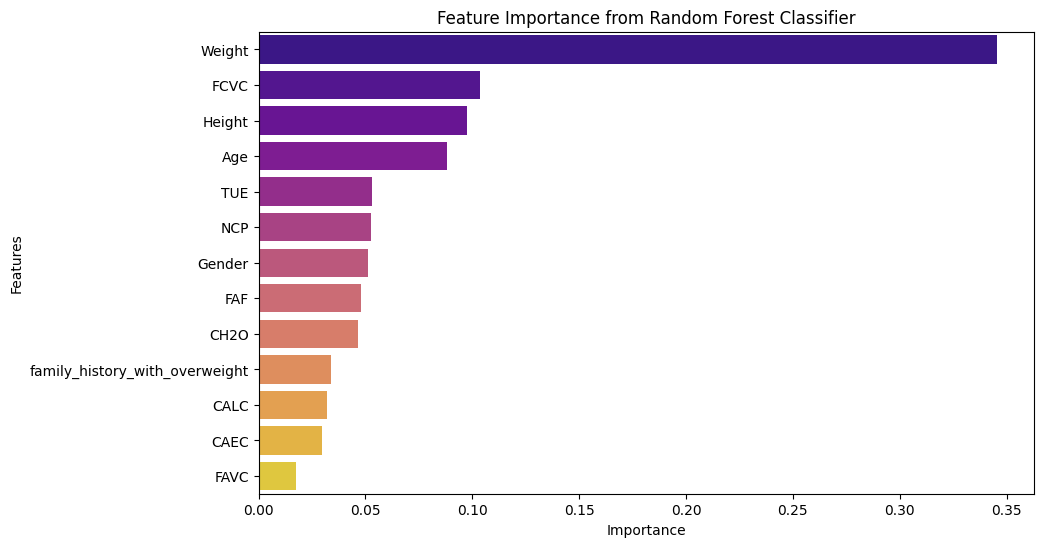

In [90]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

importances_rf = rf_model.feature_importances_
features_rf = X_train.columns

importance_rf = pd.DataFrame({
    "Features":features_rf,
    "Importance":importances_rf
}).sort_values(by="Importance",ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Features",data=importance_rf,palette="plasma")
plt.title("Feature Importance from Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [87]:
df.drop(['SCC','SMOKE'], axis=1, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,1,2.0,0.0,1.0,0,1
1,0,21,1.52,56.0,1,0,3.0,3.0,1,3.0,3.0,0.0,1,1
2,1,23,1.80,77.0,1,0,2.0,3.0,1,2.0,2.0,1.0,2,1
3,1,27,1.80,87.0,0,0,3.0,3.0,1,2.0,2.0,0.0,2,5
4,1,22,1.78,89.8,0,0,2.0,1.0,1,2.0,0.0,0.0,1,6


### Train on DT and RF

In [93]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
y_pred_dt = dt.predict(X_test)

In [95]:
accuracy = accuracy_score(y_test,y_pred_dt)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Model Accuracy: 92.34%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.88      0.70      0.78        61
           2       0.92      0.97      0.94        70
           3       0.98      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.82      0.91      0.86        55
           6       0.98      0.96      0.97        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



In [96]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [97]:
y_pred_dt = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_dt)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Model Accuracy: 96.17%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.88      0.92      0.90        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.89      0.92        55
           6       0.94      1.00      0.97        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

